## equation for hv' (compton scattering) 
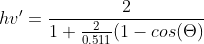

In [1]:
import numpy as np
from sympy import symbols
import math
import cmath 

import matplotlib as mpl
from matplotlib import pyplot as plt 

from scipy.stats import norm
import seaborn as sb 

import lmfit as lf
import scipy.optimize as opt 

from scipy.optimize import curve_fit 

In [2]:
math.pi 
print(math.pi) 
math.cos 
print(math.cos)

3.141592653589793
<built-in function cos>


[2.         2.00001935 2.00007741 2.00017418 2.00030964 2.00048381
 2.00069669 2.00094826 2.00123853 2.00156749 2.00193514 2.00234148
 2.0027865  2.0032702  2.00379257 2.00435361 2.00495332 2.00559168
 2.00626869 2.00698435 2.00773864 2.00853156 2.00936311 2.01023326
 2.01114203 2.01208938 2.01307533 2.01409985 2.01516294 2.01626458
 2.01740477 2.01858349 2.01980073 2.02105649 2.02235074 2.02368348
 2.02505469 2.02646435 2.02791246 2.02939901 2.03092396 2.03248732
 2.03408906 2.03572917 2.03740763 2.03912443 2.04087955 2.04267297
 2.04450467 2.04637464 2.04828285 2.0502293  2.05221395 2.05423679
 2.05629781 2.05839697 2.06053426 2.06270966 2.06492314 2.06717469
 2.06946428 2.07179188 2.07415749 2.07656106 2.07900259 2.08148204
 2.08399939 2.08655461 2.08914769 2.09177859 2.09444729 2.09715376
 2.09989797 2.1026799  2.10549953 2.10835681 2.11125173 2.11418426
 2.11715436 2.12016201 2.12320718 2.12628984 2.12940995 2.13256749
 2.13576242 2.13899472 2.14226434 2.14557127 2.14891546 2.1522

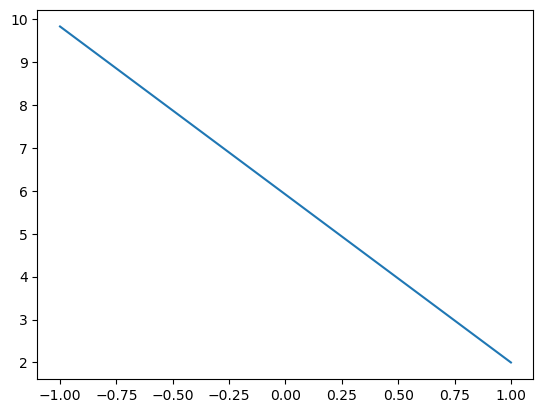

In [3]:
# Equation set up  
mev=2 

num_points = 1000 
a_values = np.linspace(0, np.pi, num_points) 
cos_values = np.cos(a_values) 

hv=mev/1+(mev/0.511)*(1-np.cos(a_values)) 
print (hv) 

plt.plot(cos_values,hv)

## Klein-Nishina Formula 
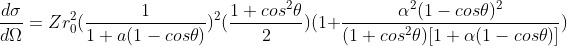 
### Instead of cos() we will use hv 

In [4]:
z=2 #Helium 
print(z)

r= 2.8179403262 * 10**-15 #m
print(r) 

mc= 0.511 #MeV
a= (hv)/(mc) 
print(a)

2
2.8179403262000004e-15
[ 3.91389432  3.9139322   3.91404582  3.91423518  3.91450028  3.91484112
  3.9152577   3.91575002  3.91631805  3.91696181  3.91768129  3.91847647
  3.91934736  3.92029393  3.92131619  3.92241412  3.92358771  3.92483695
  3.92616182  3.92756232  3.92903844  3.93059014  3.93221743  3.93392028
  3.93569868  3.93755261  3.93948205  3.94148698  3.94356739  3.94572325
  3.94795454  3.95026123  3.95264332  3.95510076  3.95763354  3.96024164
  3.96292502  3.96568367  3.96851754  3.97142662  3.97441088  3.97747029
  3.98060481  3.98381442  3.98709908  3.99045876  3.99389344  3.99740306
  4.00098761  4.00464704  4.00838132  4.01219041  4.01607427  4.02003287
  4.02406616  4.02817411  4.03235667  4.03661381  4.04094548  4.04535164
  4.04983224  4.05438725  4.05901661  4.06372028  4.06849822  4.07335037
  4.07827669  4.08327713  4.08835164  4.09350018  4.09872268  4.10401909
  4.10938938  4.11483347  4.12035133  4.12594288  4.13160809  4.13734689
  4.14315922  4.14904504  

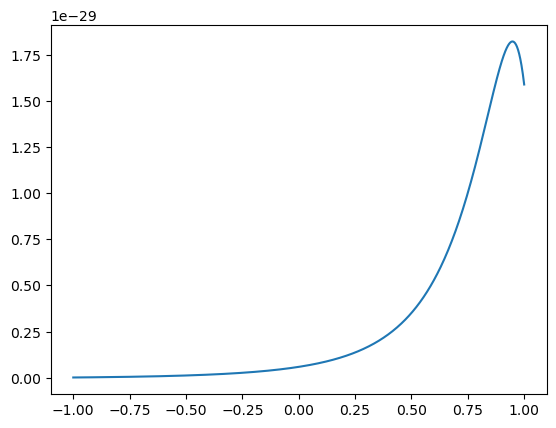

In [5]:
#KN=z*(r**2)*((1/(1+a*(1-(np.cos(a_values))))**2)*((1+((np.cos(a_values)**2))/2)*(1+((a**2)*(1-(np.cos(a_values)))**2)/((1+((np.cos(a_values))**2))*[1+a*(1-(np.cos(a_values)))])) 
#print(KN) 
                                                  
KN=z*(r**2)*((1/(1+a*(1-(np.cos(a_values)))))**2)*((1+((np.cos(a_values))**2))/2)*(1+(((a**2)*((1-(np.cos(a_values))**2)/((1+(np.cos(a_values))**2)*(1+a*(1-(np.cos(a_values))))))))) 
plt.plot(cos_values,KN)

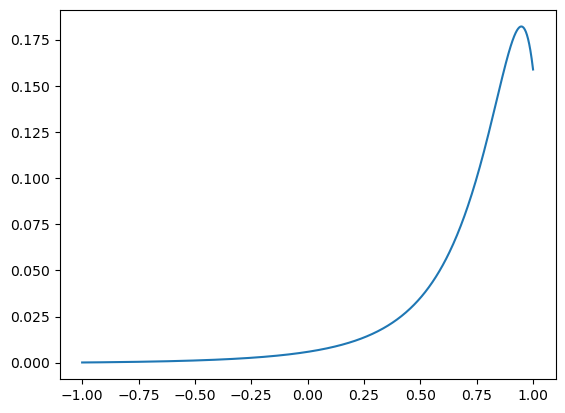

In [6]:
#Convert to barns
# m^2 to barnes 
# 1.50 x E-29 = .15 barns 

KN=z*(r**2)*((1/(1+a*(1-(np.cos(a_values)))))**2)*((1+((np.cos(a_values))**2))/2)*(1+(((a**2)*((1-(np.cos(a_values))**2)/((1+(np.cos(a_values))**2)*(1+a*(1-(np.cos(a_values)))))))))
KNB= KN*(1.0 * 10**28)
plt.plot(cos_values,KNB)

## solving for theta  
  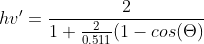

In [19]:
hv=1
theta = np.arccos(1 - ((2 / hv) - 1) / (2 / 0.511)) 
print(theta)
theta_degrees = math.degrees(theta) 
print (theta_degrees)

0.731010725038599
41.883829323510014


In [8]:
hv=2
theta = np.arccos(1 - ((2 / hv) - 1) / (2 / 0.511)) 
theta_degrees = math.degrees(theta) 
print (theta)

0.0


### hv'=3-10="nan"

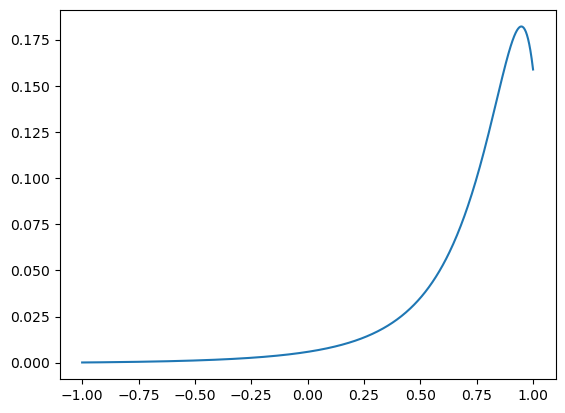

In [9]:
KN1=z*(r**2)*((1/(1+a*(1-(np.cos(0.731010725038599)))))**2)*((1+((np.cos(0.731010725038599))**2))/2)*(1+(((a**2)*((1-(np.cos(0.731010725038599))**2)/((1+(np.cos(0.731010725038599))**2)*(1+a*(1-(np.cos(0.731010725038599)))))))))
KNB1= KN*(1.0 * 10**28)
plt.plot(cos_values,KNB)

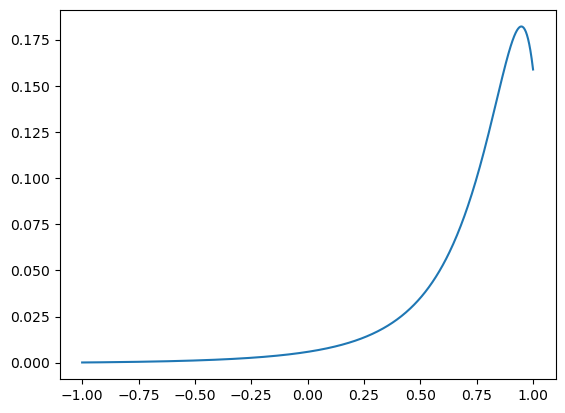

In [10]:
KN1=z*(r**2)*((1/(1+a*(1-(np.cos(0)))))**2)*((1+((np.cos(0))**2))/2)*(1+(((a**2)*((1-(np.cos(0))**2)/((1+(np.cos(0))**2)*(1+a*(1-(np.cos(0)))))))))
KNB1= KN*(1.0 * 10**28)
plt.plot(cos_values,KNB)

## Set of thetas from 1-2hv

In [11]:
hv_values=[x/100 for x in range(5,201,5)]
print(hv_values)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0]


In [12]:
for hv in hv_values:
    theta = np.arccos(1 - ((2 / hv) - 1) / (2 / 0.511)) 
    theta_degrees = math.degrees(theta) 
    print(f"hv: {hv}, {theta_degrees}")

hv: 0.05, nan
hv: 0.1, nan
hv: 0.15, nan
hv: 0.2, nan
hv: 0.25, 142.04555429895177
hv: 0.3, 116.60475761536479
hv: 0.35, 101.8002310965716
hv: 0.4, 91.26060885235034
hv: 0.45, 83.11110367751121
hv: 0.5, 76.49678060631457
hv: 0.55, 70.9490337925755
hv: 0.6, 66.18196155515822
hv: 0.65, 62.00813766495131
hv: 0.7, 58.298090891611295
hv: 0.75, 54.95870578062001
hv: 0.8, 51.9208112573424
hv: 0.85, 49.13162374417023
hv: 0.9, 46.54992761943541
hv: 0.95, 44.14288118190673
hv: 1.0, 41.883829323510014
hv: 1.05, 39.75076150820979
hv: 1.1, 37.72519507013526
hv: 1.15, 35.79134485334923
hv: 1.2, 33.935488175586066
hv: 1.25, 32.14546312007138
hv: 1.3, 30.410255766029593
hv: 1.35, 28.71964219450532
hv: 1.4, 27.063855959519376
hv: 1.45, 25.433251785966164
hv: 1.5, 23.81793074449516
hv: 1.55, 22.20727821914218
hv: 1.6, 20.58933680901371
hv: 1.65, 18.94987597429088
hv: 1.7, 17.270889504428478
hv: 1.75, 15.527944533702799
hv: 1.8, 13.684995077215984
hv: 1.85, 11.682760040738362
hv: 1.9, 9.40684878467821
hv

C:\Users\Isikinz\AppData\Local\Temp\ipykernel_18496\1565347884.py:2: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(1 - ((2 / hv) - 1) / (2 / 0.511))


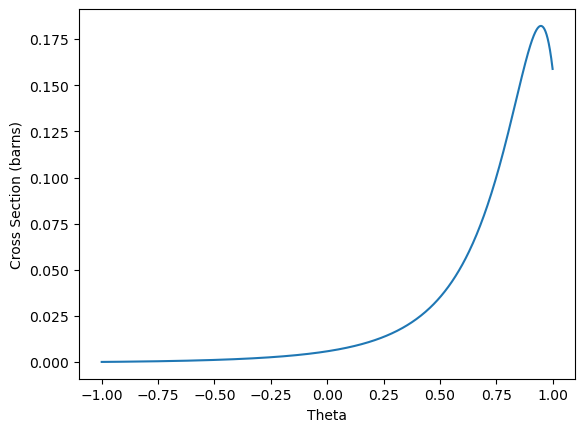

In [13]:
KN1=z*(r**2)*((1/(1+a*(1-(np.cos(theta_degrees)))))**2)*((1+((np.cos(theta_degrees))**2))/2)*(1+(((a**2)*((1-(np.cos(theta_degrees))**2)/((1+(np.cos(theta_degrees))**2)*(1+a*(1-(np.cos(theta_degrees)))))))))
KNB1= KN*(1.0 * 10**28)
plt.plot(cos_values,KNB1)

plt.xlabel("Theta")
plt.ylabel("Cross Section (barns)")

plt.show()

## solving for hv'  
  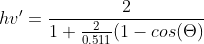

x: 1.0, y: 0.15881575364048328
x: 0.9999950553174459, y: 0.15882085046379776
x: 0.9999802213186832, y: 0.15883613675513267
x: 0.999955498150411, y: 0.1588615999814651
x: 0.9999208860571255, y: 0.15889721926377015
x: 0.9998763853811183, y: 0.15894296539103417
x: 0.9998219965624732, y: 0.15899880083986648
x: 0.9997577201390606, y: 0.15906467979970113
x: 0.9996835567465339, y: 0.15914054820357573
x: 0.9995995071183217, y: 0.15922634376447725
x: 0.9995055720856215, y: 0.15932199601723707
x: 0.9994017525773913, y: 0.15942742636595839
x: 0.99928804962034, y: 0.15954254813695598
x: 0.9991644643389178, y: 0.15966726663718314
x: 0.9990309979553044, y: 0.15980147921812343
x: 0.9988876517893979, y: 0.15994507534511423
x: 0.9987344272588006, y: 0.16009793667207686
x: 0.9985713258788059, y: 0.16025993712161316
x: 0.9983983492623831, y: 0.16043094297043645
x: 0.9982154991201608, y: 0.16061081294009555
x: 0.9980227772604111, y: 0.16079939829294598
x: 0.9978201855890307, y: 0.16099654293332916
x: 0.99

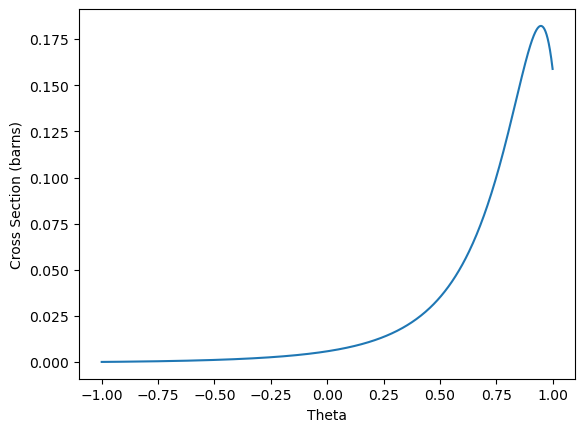

In [14]:
KN1=z*(r**2)*((1/(1+a*(1-(np.cos(theta_degrees)))))**2)*((1+((np.cos(theta_degrees))**2))/2)*(1+(((a**2)*((1-(np.cos(theta_degrees))**2)/((1+(np.cos(theta_degrees))**2)*(1+a*(1-(np.cos(theta_degrees)))))))))
KNB1= KN*(1.0 * 10**28)
plt.plot(cos_values,KNB1)

plt.xlabel("Theta")
plt.ylabel("Cross Section (barns)")

lines = plt.gca().get_lines()  

for line in lines:
    x_data = line.get_xdata()  
    y_data = line.get_ydata() 

   
    for x, y in zip(x_data, y_data):
        print(f"x: {x}, y: {y}")

In [15]:
#recall=np.interp (1,cos_values,KNB1)
#Recall=recall*(10**3)
#print(Recall)

In [16]:
HV=(2/1+(2/0.511)*(1-y_data)) 
print(HV)

[5.29230625 5.2922863  5.29222647 5.29212681 5.2919874  5.29180835
 5.29158982 5.29133198 5.29103504 5.29069924 5.29032487 5.28991223
 5.28946165 5.28897352 5.28844822 5.2878862  5.28728792 5.28665387
 5.28598457 5.28528058 5.28454247 5.28377087 5.28296641 5.28212975
 5.28126159 5.28036266 5.2794337  5.27847548 5.27748881 5.27647451
 5.27543342 5.27436643 5.27327443 5.27215834 5.27101909 5.26985765
 5.268675   5.26747214 5.2662501  5.26500991 5.26375263 5.26247934
 5.26119113 5.2598891  5.25857437 5.25724809 5.25591139 5.25456543
 5.2532114  5.25185046 5.25048382 5.24911268 5.24773824 5.24636171
 5.24498433 5.24360732 5.24223191 5.24085934 5.23949084 5.23812767
 5.23677105 5.23542224 5.23408247 5.23275298 5.23143501 5.2301298
 5.22883857 5.22756255 5.22630295 5.22506098 5.22383785 5.22263476
 5.22145288 5.2202934  5.21915747 5.21804624 5.21696086 5.21590245
 5.21487211 5.21387095 5.21290005 5.21196045 5.21105322 5.21017937
 5.20933991 5.20853584 5.20776811 5.20703769 5.20634548 5.20569

Text(0, 0.5, 'Cross Section (barns)')

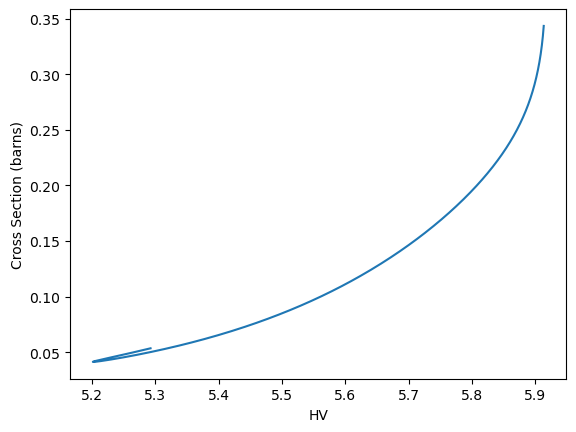

In [17]:
KN2=z*(r**2)*((1/(1+a*(1-(np.cos(HV)))))**2)*((1+((np.cos(HV))**2))/2)*(1+(((a**2)*((1-(np.cos(HV))**2)/((1+(np.cos(HV))**2)*(1+a*(1-(np.cos(HV)))))))))
KNB2= KN2*(1.0 * 10**28)
plt.plot(HV,KNB2)

plt.xlabel("HV")
plt.ylabel("Cross Section (barns)")